# 1.回歸_線性回歸

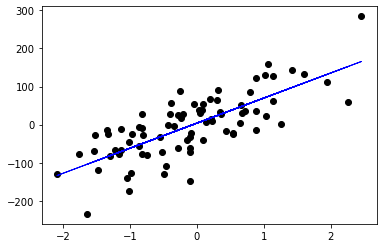

0.564297441799962


In [2]:
#首先，我們先讀取我們要用來建模的資料。
#在這裡，我們用make_regression來下載sklearn裡面資料集的資料。 
#在這裡，我們抽取100個樣本，特徵數為一，並設定噪音為50。
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

X,y=make_regression(n_samples=100, n_features=1, noise=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, regr.predict(X_train),color='blue',linewidth=1)
plt.show()

# 模型績效
#mse = np.mean((lm.predict(X) - y) ** 2)
r_squared = regr.score(X_train, y_train)
print(r_squared)

# 2.以鐵達尼資料為例說明

## 2.1 模型訓練前資料準備

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

%matplotlib inline

In [4]:
df_train = pd.read_csv(r'D:\ML100\Day35\Titanic_train.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#1.age missing => 由前往後補值
df_train['Age'] = df_train['Age'].fillna(method='bfill')

In [7]:
#2.cabin 遺失值超過70%故刪除
df_train_2 = df_train.drop('Cabin',axis=1)

In [8]:
#3.Sex轉換為數值型
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df_train_2.copy()
df2['Sex'] = le.fit_transform(df2['Sex'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [9]:
#4.剔除遺失值3筆
df2 = df2.dropna()
df2['Embarked'] = le.fit_transform(df2['Embarked'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int32  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 76.4+ KB


In [10]:
#5.建立 訓練集 與 測試集
from sklearn.model_selection import train_test_split

train_X = df2[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]

X_train, X_test, y_train, y_test = train_test_split(
train_X, df2['Survived'], test_size=0.2, random_state=0)

## 2.2 模型_ logistic reg

Logistic socre on training: 0.8115330520393812
Logistic socre on testing: 0.7191011235955056



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


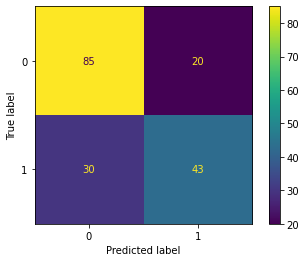

In [11]:
from sklearn import preprocessing, linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(X_train,y_train)

# accuracy
print(f'Logistic socre on training: {logistic_regr.score(X_train,y_train)}')
print(f'Logistic socre on testing: {logistic_regr.score(X_test, y_test)}\n')

# confusion matrix
plot_confusion_matrix(logistic_regr, X_test, y_test)


## 2.2 模型_決策樹

Dscision tree socre on training: 0.8326300984528833
Dscision tree socre on testing: 0.7303370786516854



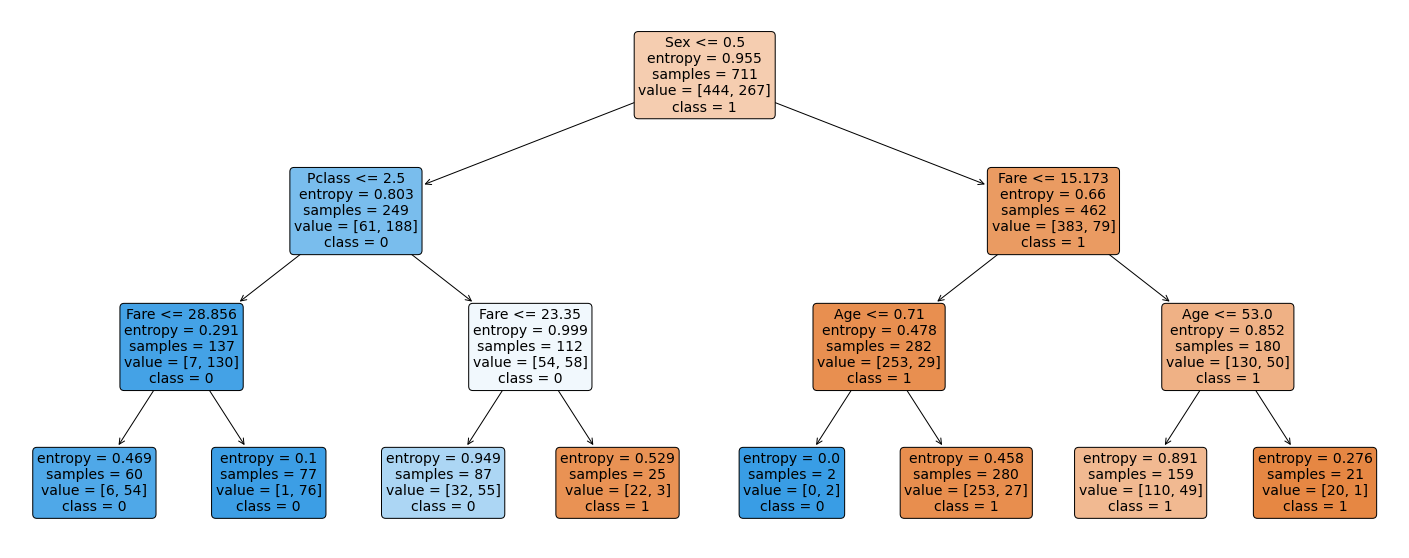

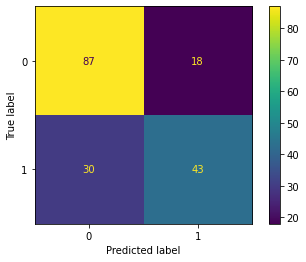

In [17]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
classifier.fit(X_train,y_train)
print(f'Dscision tree socre on training: {classifier.score(X_train,y_train)}')
print(f'Dscision tree socre on testing: {classifier.score(X_test, y_test)}\n')

plt.figure(figsize=(25,10))
a = tree.plot_tree(classifier, 
              feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'], 
              class_names=["1", "0"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

# confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)

## 2.2模型_SVM

SVM socre on training: 0.6821378340365682
SVM socre on testing: 0.6292134831460674



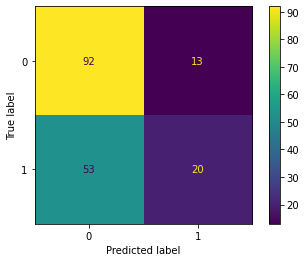

In [14]:
#2.SVM
from sklearn import svm, datasets
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train,y_train)
print(f'SVM socre on training: {SVM.score(X_train,y_train)}')
print(f'SVM socre on testing: {SVM.score(X_test, y_test)}\n')

# confusion matrix
plot_confusion_matrix(SVM, X_test, y_test)


## 2.2 模型_KNN

KNN socre on training: 0.8312236286919831
KNN socre on testing: 0.6910112359550562



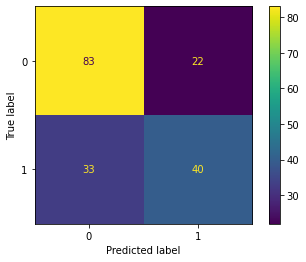

In [15]:
from sklearn.neighbors import KNeighborsClassifier
#從k=1開始測試
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(f'KNN socre on training: {knn.score(X_train,y_train)}')
print(f'KNN socre on testing: {knn.score(X_test, y_test)}\n')

# confusion matrix
plot_confusion_matrix(knn, X_test, y_test)

## 2.3 模型比較 

In [16]:
#上述四種方法比較
print(f'Logistic socre on training: {logistic_regr.score(X_train,y_train)}')
print(f'Logistic socre on testing: {logistic_regr.score(X_test, y_test)}\n')
print(f'Dscision tree socre on training: {classifier.score(X_train,y_train)}')
print(f'Dscision tree socre on testing: {classifier.score(X_test, y_test)}\n')
print(f'SVM socre on training: {SVM.score(X_train,y_train)}')
print(f'SVM socre on testing: {SVM.score(X_test, y_test)}\n')
print(f'KNN socre on training: {knn.score(X_train,y_train)}')
print(f'KNN socre on testing: {knn.score(X_test, y_test)}\n')

Logistic socre on training: 0.8115330520393812
Logistic socre on testing: 0.7191011235955056

Dscision tree socre on training: 0.8326300984528833
Dscision tree socre on testing: 0.7303370786516854

SVM socre on training: 0.6821378340365682
SVM socre on testing: 0.6292134831460674

KNN socre on training: 0.8312236286919831
KNN socre on testing: 0.6910112359550562

